# 1. The Problem:

Here, the data has been taken from [Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database?select=diabetes.csv). "This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several _constraints_ were placed on the selection of these instances from a larger database. In particular, __all patients__ here are __females__ at least 21 years old of Pima Indian heritage.

The datasets consists of several medical predictor variables and one target variable, `Outcome`. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. The __problem__ is build to an accurate model that can predict whether or not the patients in the dataset have diabetes.

In [1]:
# import the required libraries

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

%matplotlib inline
plt.style.use('bmh')

import warnings
warnings.filterwarnings('ignore')

# 2. Importing the Data:

We will use Python's Pandas feature to import the data in the kernel. 

In [2]:
data = pd.read_csv('diabetes.csv')
data.head(10) #view the first 10 rows of the data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


The `outcome` is the target variable. An outcome of 0 mean the patient doesn't have diabetes and an outcome of 1 means that she (since all the patients are females) does. Before we delve into building the ML model for our problem, let us do some exploratory data analysis.

# 3. Exploratory Data Analysis:

Exploratory Data Analysis (EDA) helps visualizing the data and finding insights which will help us in Data cleaning/preparation/transformation and finally in choosing and modeling our Machine Learning algorithm. I will extensively follow the steps outlined by Mr. Tuatini Godard [here](https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python).

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


This above code shows us that there are __no__ missing values (all 768 data points are non-null). _This, however, rarely happens in real life._ More often than not, most of the work of data preparation goes into dealing with missing (or NaN) values. In our current example, there aren't any missing values, therefore we are going to skip the steps where we take care of them.

Also, most of the times, some irrelevant data is present in most datasets, e.g. `Id`. We have to figure out our goal/target and what data columns will be helpful to us for prediction of the target. Thankfully, for our current dataset, all columns seem to be relevant. The irrelevant columns are generally discarded.

Let us first take a look at the age distribution of all the patients. This will give us a general idea of the demographic of the dataset and might be helpful in decision making later.

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64


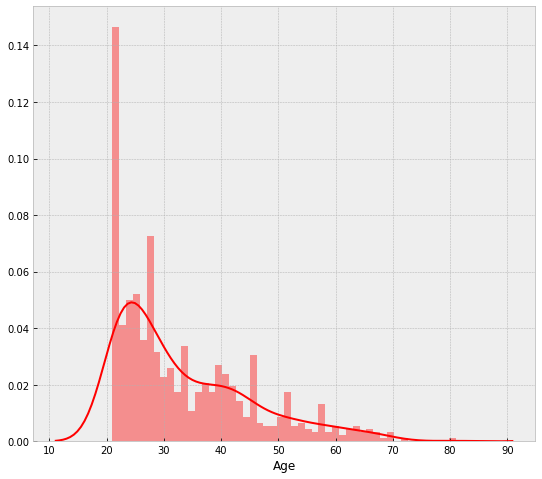

In [4]:
# show the details of the AGE column
print(data.Age.describe())

plt.figure(figsize=(9,8))
sns.distplot(data.Age, color='r', bins=50, hist_kws={'alpha':0.4}) # distribution plot

The lowest aged woman in the dataset is 21 yrs old and the oldest one is 81. On an average, the dataset contains women who are __33__ years old, and more than 75% of the women are under the age of 41. Furthermore, the largest concentration of the women seem to be from the age group 20-30 yrs. This gives us some good insight - we would expect most of these women to __not__ have diabetes (since 41 yrs old is still considered quite young - although for some people the disease is genetic and doesn't depend on age).

#### 3.1 Numerical Data Distribution:

Let us look at the numerical data distribution of __all__ the features by plotting them all. Thankfully, all the data columns are numeric in our case (we will confirm this again). If there were more types of data, we would just select the numeric ones and plot them.

In [5]:
print(data.dtypes) # confirming all columns to have numerical values

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026D4623E108>,
      dtype=object)

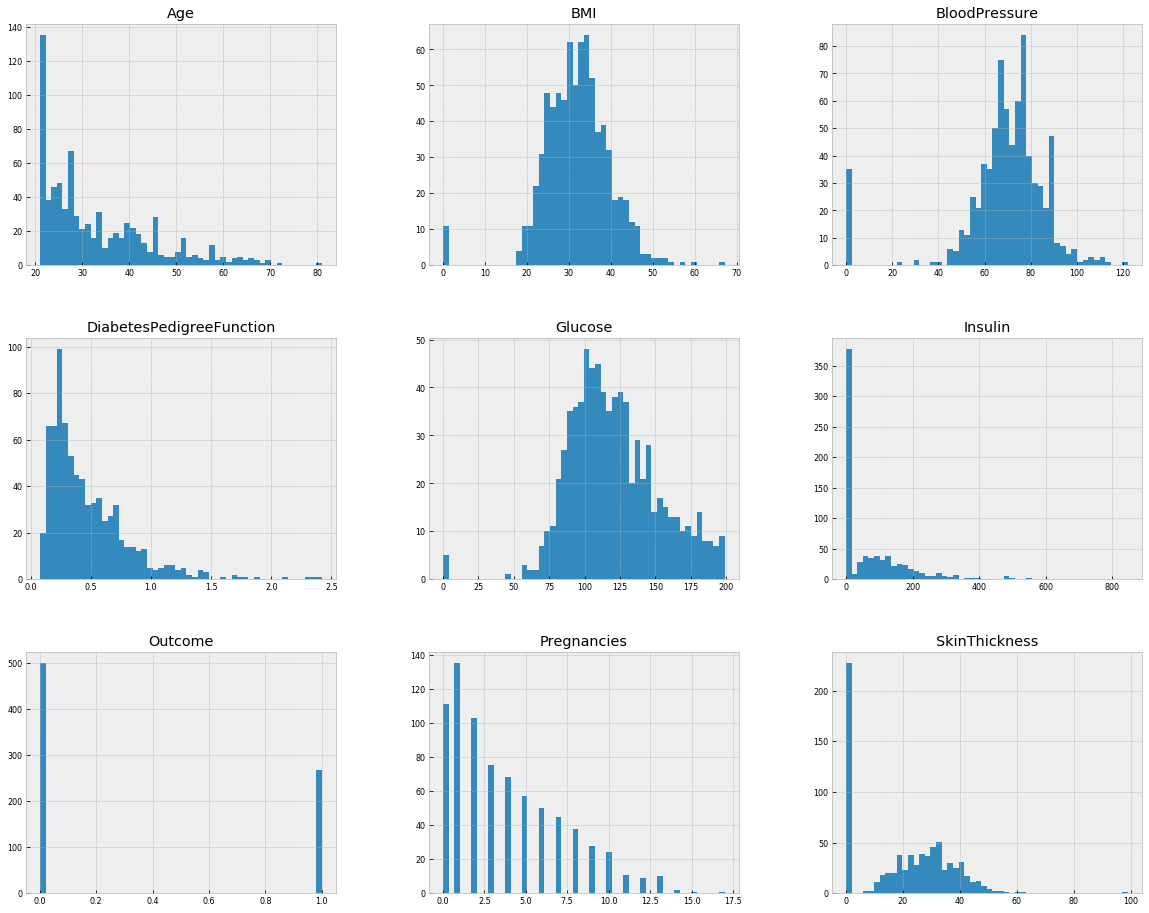

In [6]:
# histogram plotting to look at all the data distributions:
data.hist(figsize = (20,16), bins=50, xlabelsize=8, ylabelsize=8)

We can see some interesting trends here. There are significant numbers of the value `0` in the columns __BMI__, __BloodPressure__, __Glucose__, __Insulin__ and __SkinThickness__. These features having a value of 0 doesn't really make sense. What this tells us is these must be _missing_ values, only filled up as `0` since they were missing. Let's change these values to NaN - this will help us process them into either of mean of some other constant (we will fill them up with the mean values of the rest of the data).

In [7]:
df = data.copy()

df[['BMI','BloodPressure','Glucose','Insulin', 'SkinThickness']] = df[['BMI','BloodPressure','Glucose','Insulin', 'SkinThickness']].replace(0,np.NaN)

# Now check the sum of the missing values:
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Now that we have the data without the zeros, let's check how the histogram now looks.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026D4702EF48>,
      dtype=object)

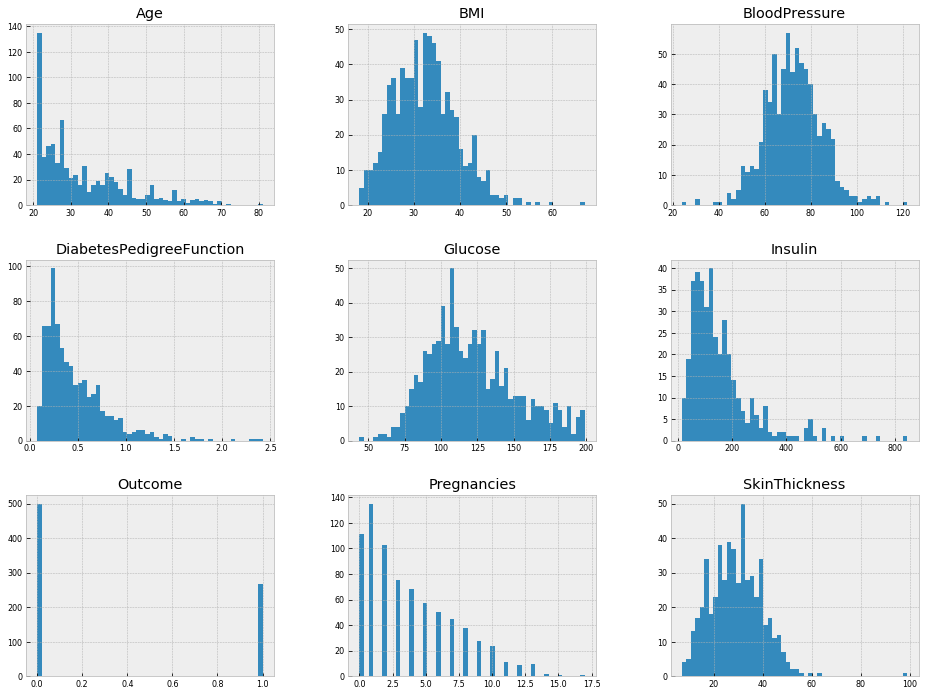

In [8]:
df.hist(figsize=(16,12), bins=50, xlabelsize=8, ylabelsize=8)

There are a lot of missing values in our dataset and they can be filled with numbers in different ways. I will use the K-Nearest Neighbors (KNN) method of imputation. More information on `KNNImputer` can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer).

In [9]:
from sklearn.impute import KNNImputer
knn = KNNImputer(missing_values=np.nan, weights='distance')

imputed_df = pd.DataFrame(knn.fit_transform(df))

imputed_df.columns = df.columns

imputed_df.Outcome = imputed_df.Outcome.round().astype(int)

imputed_df.Age = imputed_df.Age.round().astype(int)

imputed_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,165.941157,33.6,0.627,50,1
1,1.0,85.0,66.0,29.000000,60.705334,26.6,0.351,31,0
2,8.0,183.0,64.0,26.111667,172.186312,23.3,0.672,32,1
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


Now that we have used the `KNNImputer` with the _default_ value of n=5 and filled up the missing values, let's check whether our method worked, followed by the new distribution.

In [10]:
imputed_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026D478CBF88>,
      dtype=object)

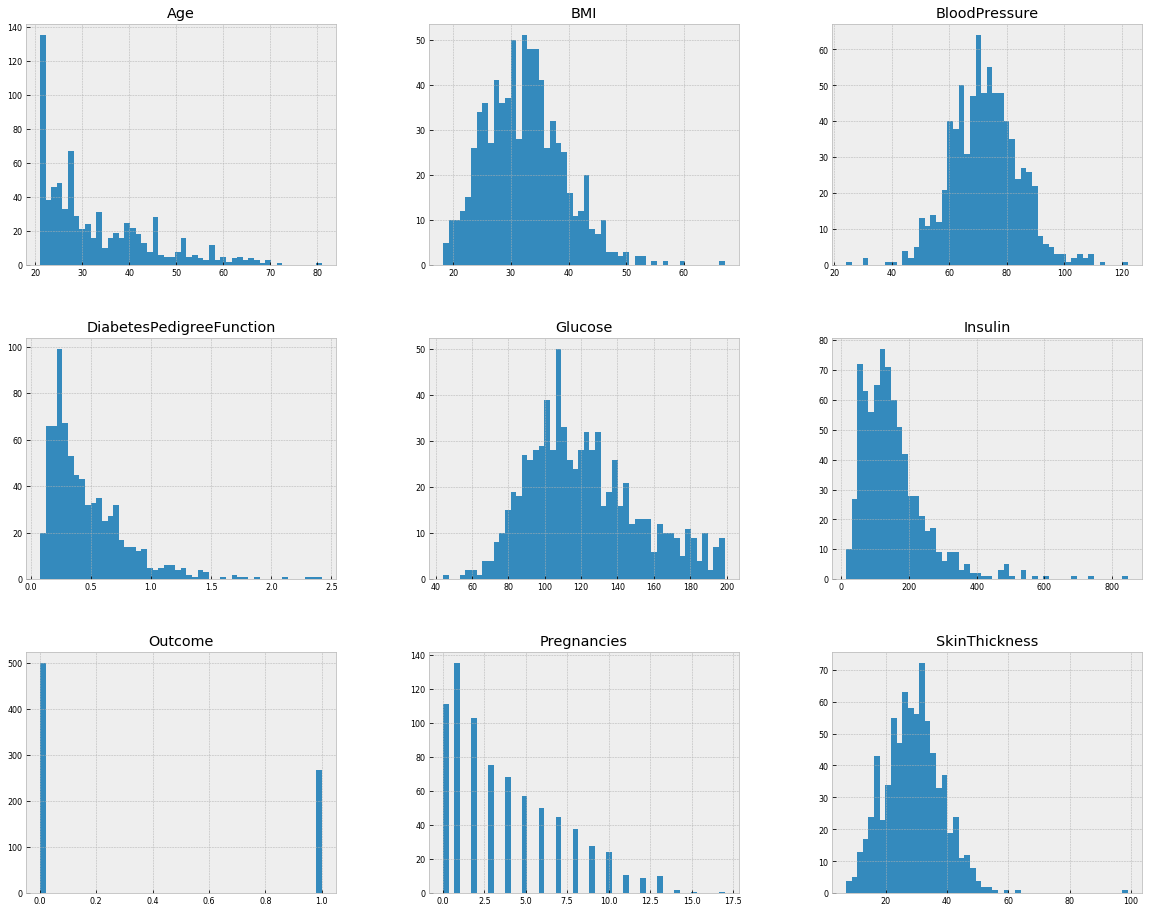

In [11]:
imputed_df.hist(bins=50, xlabelsize=8, ylabelsize=8, figsize=(20,16))

As expected, there are no significant differences, just some subtle changes to the distribution, which we will further look into.

We will try to find which features are strongly correlated with `Outcome`. We'll store them in a variable called `corr_list`. We'll reuse our `imputed_df` dataset to do so.

In [12]:
df_corr = imputed_df.corr()['Outcome'][:-1] # [:-1] indicates we are selecting all rows except the one with index -1 (which is the outcome)

corr_list = df_corr.sort_values(ascending=False)

print("There follwing are the correlation coefficients of each column with Outcome:\n{}".format(corr_list))

There follwing are the correlation coefficients of each column with Outcome:
Glucose                     0.496242
Insulin                     0.321027
BMI                         0.314197
SkinThickness               0.279762
Age                         0.238356
Pregnancies                 0.221898
BloodPressure               0.176672
DiabetesPedigreeFunction    0.173844
Name: Outcome, dtype: float64


Although the variables don't strongly correlate with the outcome variable, we can see a small hint that Glucose, Insulin and BMI levels seem to correlate better than others in determining whether or not a patient had diabetes. Now let's see what the correlation of each column with respect to every other column looks like. The correlation of a column with itself is always 1.

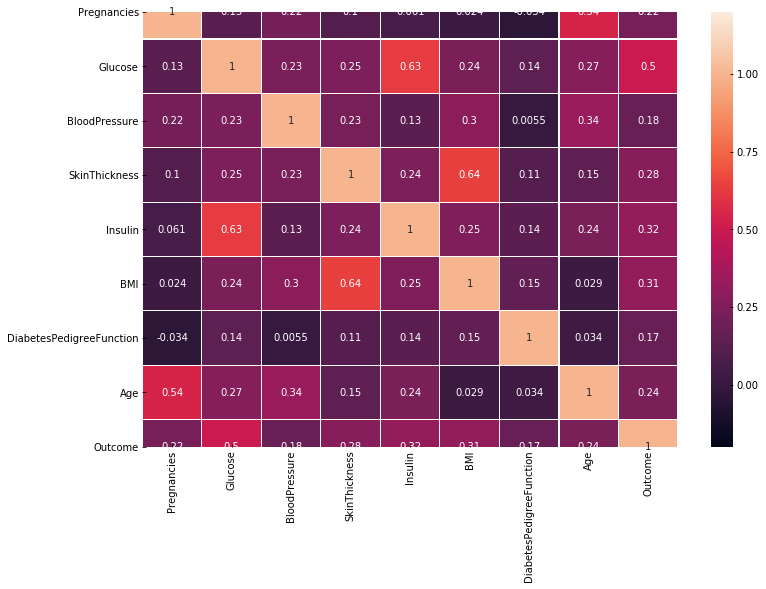

In [13]:
plt.figure(figsize=(12,8))
corr = imputed_df.corr()
sns.heatmap(corr, vmax=1.2, vmin=-0.2, linewidths=0.1, annot=True)

There are very strong correlations between `SkinThickness` and `BMI` and also between `Glucose` and `Insulin` (both are understandable). `Age` and `Pregnancies` are also well correlated as are `Glucose` and `Outcome`. A __negative correlation__ (albeit a small value) is observed between `Pregnancies` and `DiabetesPedigreeFunction`. This signifies that as one value increases, the other one drops.

# 4. Model Selection:

Now that we have the data cleaned (zeros replaced with values, no null values), we can start thinking about splitting the data into training and testing datasets and figuring out which model would be the best for this particular application. We need to remember that our target variable is a categorical value (0 or 1). Hence we have to choose `Classifier` models as opposed to `Regression` models (except for Logistic Regression, of course).

In [14]:
# Splitting the data:

X = imputed_df.drop(['Outcome'], axis=1)
y = imputed_df.Outcome

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.20, random_state=0)

#### 1. Logistic Regression:

In [16]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(random_state=0)

lgr.fit(X_train, y_train)
pred1 = lgr.predict(X_valid)

acc_lgr = round(accuracy_score(pred1, y_valid)*100,2)
print("The accuracy of Logistic Regression is ",acc_lgr,"%")

The accuracy of Logistic Regression is  81.82 %


#### 2. Gaussian Naive Bayes:

In [17]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train,y_train)
pred2 = gnb.predict(X_valid)

acc_gnb = round(accuracy_score(pred2,y_valid)*100, 2)
print("The accuracy of Gaussian Naive Bayes is ", acc_gnb, "%")

The accuracy of Gaussian Naive Bayes is  77.92 %


#### 3. Random Forest:

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train,y_train)

pred3 = rfc.predict(X_valid)

acc_rfc = round(accuracy_score(pred3, y_valid)*100, 2)
print("The accuracy of Random Forest Classifier is ", acc_rfc, "%")

The accuracy of Random Forest Classifier is  81.17 %


#### 4. Support Vector Machine (SVM):

In [19]:
from sklearn.svm import SVC
svc=SVC(random_state=0)
svc.fit(X_train, y_train)
pred4 = svc.predict(X_valid)

acc_svc = round(accuracy_score(pred4, y_valid)*100, 2)
print("The accuracy of SVM is ",acc_svc, "%")

The accuracy of SVM is  79.22 %


#### 5. Linear SVC:

In [20]:
from sklearn.svm import LinearSVC
lsvc=LinearSVC(random_state=0)
lsvc.fit(X_train, y_train)
pred5 = lsvc.predict(X_valid)

acc_lsvc = round(accuracy_score(pred5,y_valid)*100, 2)
print("The accuracy of Linear SVC is ", acc_lsvc, "%")

The accuracy of Linear SVC is  66.23 %


#### 6. Decision Trees:

In [21]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
pred6 = dtc.predict(X_valid)

acc_dtc = round(accuracy_score(pred5,y_valid)*100, 2)
print("The accuracy of Decision Tree Classifier is ", acc_dtc, "%")

The accuracy of Decision Tree Classifier is  66.23 %


#### 7. K-Nearest Neighbors (KNN):

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred7 = knn.predict(X_valid)

acc_knn = round(accuracy_score(pred7,y_valid)*100, 2)
print("The accuracy of KNN is ", acc_knn, "%")

The accuracy of KNN is  74.68 %


#### 8. Gradient Boosting Classifier:

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(X_train,y_train)
pred8 = gbc.predict(X_valid)

acc_gbc = round(accuracy_score(pred8,y_valid)*100, 2)
print("The accuracy of Gradient Boosting Classifier is ",acc_gbc,"%")

The accuracy of Gradient Boosting Classifier is  78.57 %


Let us now compare the accuracies of all the models selected above so we can come up with a definitive answer about which model suits our algortihm the best.

In [24]:
models = pd.DataFrame({"Model": ['Logistic Regression', 'Gaussian Naive Bayes', 'Random Forest', 'SVM', 'Linear SVC',
                                'Decision Trees', 'KNN', 'Gradient Boosting Classifier'], "Accuracy": [acc_lgr, acc_gnb,
                                                                                                      acc_rfc, acc_svc,
                                                                                                      acc_lsvc, acc_dtc,
                                                                                                      acc_knn, acc_gbc]})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Logistic Regression,81.82
2,Random Forest,81.17
3,SVM,79.22
7,Gradient Boosting Classifier,78.57
1,Gaussian Naive Bayes,77.92
6,KNN,74.68
4,Linear SVC,66.23
5,Decision Trees,66.23
